# WeatherPy

---

## Generating Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Importing the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"appid="+weather_api_key +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Making the API request
        response = requests.get(city_url)
        
        #checking if the response status code is 200(ok)
        if response.status_code ==200:
            
            #parse the JSON and retrieve data
            city_weather = response.json()
            
            #parsing the latitude, longitude ,max temp,humidity, cloudiness,wind speed, country and date
       
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | moyale
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | ola
Processing Record 5 of Set 1 | hihifo
Processing Record 6 of Set 1 | bogale
Processing Record 7 of Set 1 | turmalina
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | veinticinco de mayo
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | taiohae
Processing Record 13 of Set 1 | battambang
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | dingwall
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | vazante
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | shchyrets
Processing Record 22 of Set 1 | gebeit
Processing Record 23 of Set 

Processing Record 45 of Set 4 | yaren
Processing Record 46 of Set 4 | yemetsk
Processing Record 47 of Set 4 | illela
Processing Record 48 of Set 4 | hayvoron
Processing Record 49 of Set 4 | 'ohonua
Processing Record 0 of Set 5 | dili
Processing Record 1 of Set 5 | isafjordur
Processing Record 2 of Set 5 | prince rupert
Processing Record 3 of Set 5 | januaria
Processing Record 4 of Set 5 | novaya igirma
Processing Record 5 of Set 5 | petropavlovsk-kamchatsky
Processing Record 6 of Set 5 | homer
Processing Record 7 of Set 5 | thompson
Processing Record 8 of Set 5 | kendari
Processing Record 9 of Set 5 | san patricio
Processing Record 10 of Set 5 | fale old settlement
Processing Record 11 of Set 5 | prince george
Processing Record 12 of Set 5 | deder
Processing Record 13 of Set 5 | bengkulu
Processing Record 14 of Set 5 | bayganin
Processing Record 15 of Set 5 | mossel bay
Processing Record 16 of Set 5 | knyaze-volkonskoye
Processing Record 17 of Set 5 | fort st. john
Processing Record 18

Processing Record 41 of Set 8 | kokopo
Processing Record 42 of Set 8 | itigi
Processing Record 43 of Set 8 | neiafu
Processing Record 44 of Set 8 | caleta olivia
Processing Record 45 of Set 8 | yanchep
Processing Record 46 of Set 8 | yorkton
Processing Record 47 of Set 8 | dudinka
Processing Record 48 of Set 8 | aral
Processing Record 49 of Set 8 | ronda
Processing Record 0 of Set 9 | mantyharju
Processing Record 1 of Set 9 | hajipur
Processing Record 2 of Set 9 | winejok
Processing Record 3 of Set 9 | aykhal
Processing Record 4 of Set 9 | changji
Processing Record 5 of Set 9 | hafar al-batin
Processing Record 6 of Set 9 | tamanrasset
Processing Record 7 of Set 9 | sarupathar
Processing Record 8 of Set 9 | cockburn town
Processing Record 9 of Set 9 | pahokee
Processing Record 10 of Set 9 | pundong
Processing Record 11 of Set 9 | parepare
Processing Record 12 of Set 9 | medina
Processing Record 13 of Set 9 | greymouth
Processing Record 14 of Set 9 | valdivia
Processing Record 15 of Set 

Processing Record 36 of Set 12 | port douglas
Processing Record 37 of Set 12 | yeppoon
Processing Record 38 of Set 12 | aras-asan
Processing Record 39 of Set 12 | bullsbrook
Processing Record 40 of Set 12 | kannus
Processing Record 41 of Set 12 | arenapolis
Processing Record 42 of Set 12 | port macquarie
Processing Record 43 of Set 12 | coahuayana de hidalgo
Processing Record 44 of Set 12 | at taj
Processing Record 45 of Set 12 | ta`u
Processing Record 46 of Set 12 | itaituba
Processing Record 47 of Set 12 | olinda
Processing Record 48 of Set 12 | barah
Processing Record 49 of Set 12 | harnoli
Processing Record 0 of Set 13 | akureyri
Processing Record 1 of Set 13 | es castell
Processing Record 2 of Set 13 | lajeado
Processing Record 3 of Set 13 | mwatate
Processing Record 4 of Set 13 | toliara
Processing Record 5 of Set 13 | taksimo
Processing Record 6 of Set 13 | kwang binh
Processing Record 7 of Set 13 | springs
Processing Record 8 of Set 13 | cable beach
Processing Record 9 of Set 1

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          615
Lat           615
Lng           615
Max Temp      615
Humidity      615
Cloudiness    615
Wind Speed    615
Country       615
Date          615
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,279.84,97,100,16.34,TF,1699924180
1,moyale,3.5167,39.0584,292.98,86,100,2.64,KE,1699924180
2,port mathurin,-19.6833,63.4167,298.38,77,1,2.12,MU,1699924181
3,ola,59.5833,151.2833,258.89,75,66,5.91,RU,1699924182
4,hihifo,59.5833,151.2833,258.89,75,66,5.91,RU,1699924182


In [12]:
# Exporting the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.84,97,100,16.34,TF,1699924180
1,moyale,3.5167,39.0584,292.98,86,100,2.64,KE,1699924180
2,port mathurin,-19.6833,63.4167,298.38,77,1,2.12,MU,1699924181
3,ola,59.5833,151.2833,258.89,75,66,5.91,RU,1699924182
4,hihifo,59.5833,151.2833,258.89,75,66,5.91,RU,1699924182


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

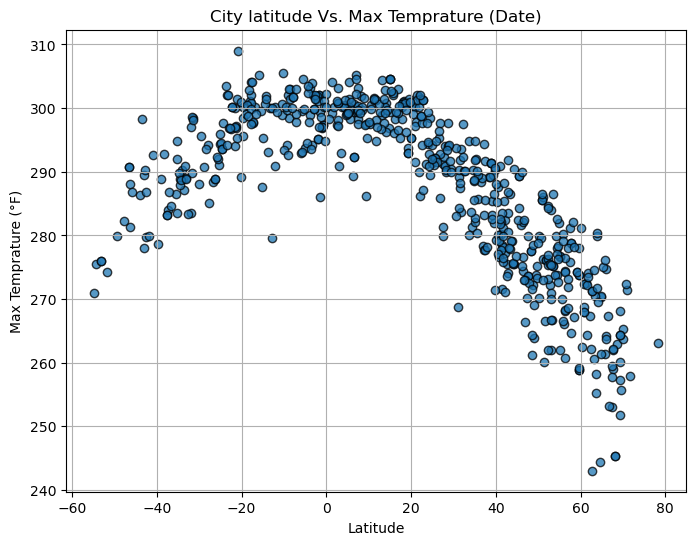

In [14]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker= "o", edgecolors = "black", alpha =0.75)

# Incorporate the other graph properties
plt.title("City latitude Vs. Max Temprature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [15]:
# Build the scatter plots for latitude vs. humidity
 plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker ="o",edgecolors= "black",alpha = 0.75)


# Incorporate the other graph properties
plt.title("City latitude Vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

IndentationError: unexpected indent (3614430834.py, line 2)

#### Latitude Vs. Cloudiness

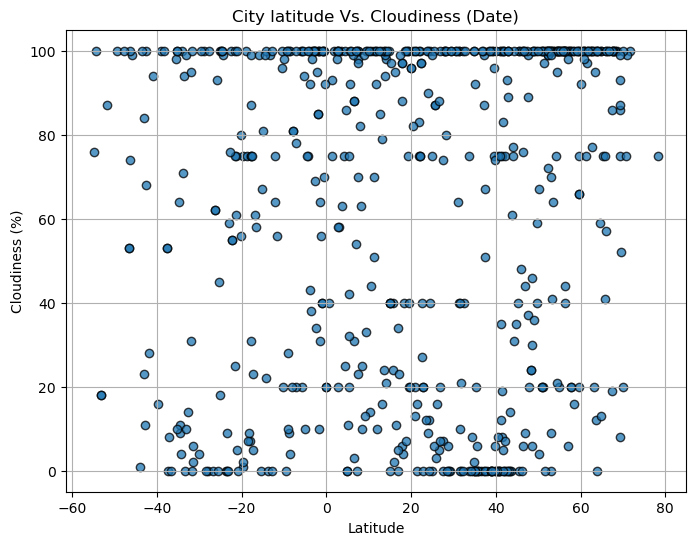

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker ="o",edgecolors= "black",alpha = 0.75)


# Incorporate the other graph properties
plt.title("City latitude Vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

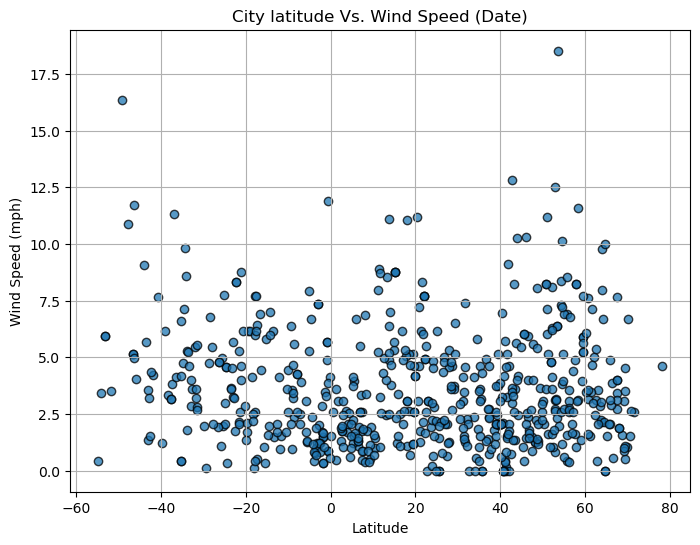

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker ="o",edgecolors= "black",alpha = 0.75)
            
# Incorporate the other graph properties
plt.title("City latitude Vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Defining a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values,x_label, y_label,title, output_file):
    
    #performing linear regression
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
     
     #calculating the regression line
    regress_values = x_values * slope + intercept
     
     #creating the linear regression equation as a string
    line_eq = "y =" + str(round(slope,2))+"x +" + str(round(intercept,2))
     
     #creating the scatter plot
     
    plt.scatter(x_values,y_values)
     
     #plot the regression line
    plt.plot(x_values, regress_values, "r-")
     
     #Annotate the linear equation on the plot
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize = 12, color = "red")
     
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r value is {rvalue}")

     # Show plot
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filtering data for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,moyale,3.5167,39.0584,292.98,86,100,2.64,KE,1699924180
3,ola,59.5833,151.2833,258.89,75,66,5.91,RU,1699924182
4,hihifo,59.5833,151.2833,258.89,75,66,5.91,RU,1699924182
5,bogale,16.2833,95.4000,298.34,89,95,2.48,MM,1699924094
7,tiksi,71.6872,128.8694,257.98,93,100,2.61,RU,1699924183


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filtering data for Southern Hemisphere (latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.84,97,100,16.34,TF,1699924180
2,port mathurin,-19.6833,63.4167,298.38,77,1,2.12,MU,1699924181
6,turmalina,-17.2856,-42.7300,297.67,42,5,0.52,BR,1699924183
8,adamstown,-25.0660,-130.1015,296.00,85,100,7.76,PN,1699924183
9,veinticinco de mayo,-35.4323,-60.1727,286.47,71,98,0.45,AR,1699924184


###  Temperature vs. Latitude Linear Regression Plot

In [21]:
#northern_hemi_df["Lat"].values

In [22]:
#northern_hemi_df["Max Temp"].values

The r value is -0.8901497608131888


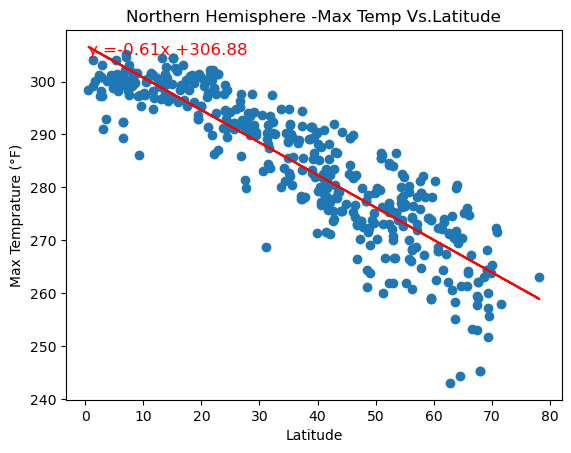

In [23]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"].values, northern_hemi_df["Max Temp"].values, "Latitude", "Max Temprature (°F)", "Northern Hemisphere -Max Temp Vs.Latitude", "output_data/NH_MaxTemp_vs_Latitude.png") 

The r value is 0.7273757311802362


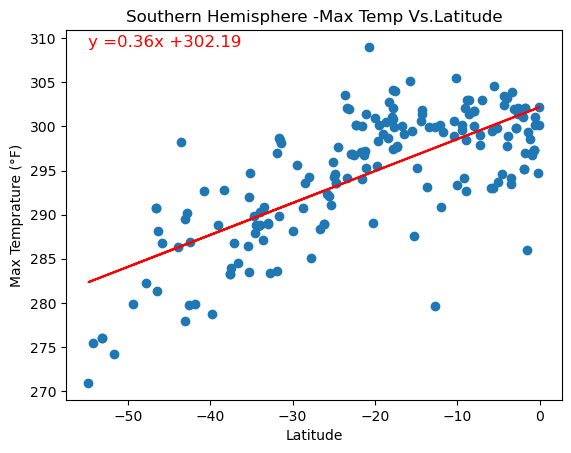

In [27]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temprature (°F)", "Southern Hemisphere -Max Temp Vs.Latitude", "output_data/SH_MaxTemp_vs_Latitude.png") 

## Discussion about the linear relationship:
**For the Northern hemisphere** here, r value of -0.89 
(approx.) indicates a strong negative linear correlation between the latitude and Maximum Temprature . This means that as the latitude increases, the Max temprature tends to decrease. Here -0.89 is quite close to -1, suggesting that the both variables are significantly inversely related to each other.

**For the Southern Hemisphere**, r value of 0.73 (approx.) indicates a strong positive linear correlation between latitude and max temprature . This means that as one variable increases, the other variable also tends to increase. The value is quite close to 1, suggesting that there is a significant direct relationship.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.27837828494692846


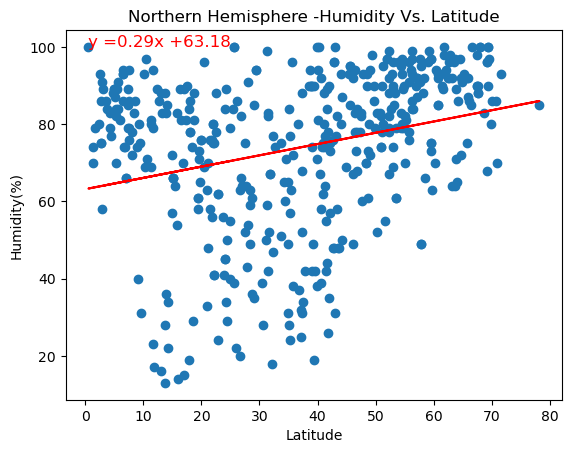

In [28]:
# Performing linear regression on Northern Hemisphere data (latitude vs. humidity)
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Latitude", "Humidity(%)", "Northern Hemisphere -Humidity Vs. Latitude",
"output_data/NH_Humidity_vs_Latitude.png")                      
                       


The r value is 0.13583960693707428


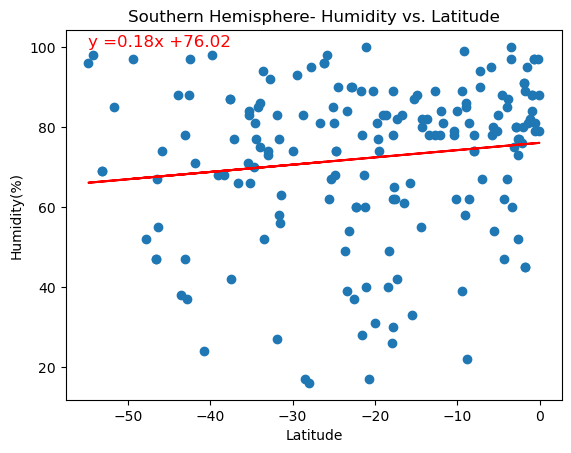

In [29]:
## Performing linear regression on Southern Hemisphere data (latitude vs. humidity)
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Latitude", "Humidity(%)", "Southern Hemisphere- Humidity vs. Latitude",
                       "output_data/SH_Humidity_vs_Latitude.png")

**Discussion about the linear relationship:**
In the northern hemisphere, An r value of 0.28 (approx.) indicates a weak positive linear correlation between latitude and humidity. This suggests that there is a slight tendency for one variable to increase as the other one increases, but the relationship is not strong.

**In the southern hemishphere**, r value of 0.14 (approx.) indicates a very weak positive linear correlation between latitude and humidity. This suggests that there is a slight tendency for one variable to increase as the other one increases, but the relationship is weak and not strongly predictive.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.146752911800162


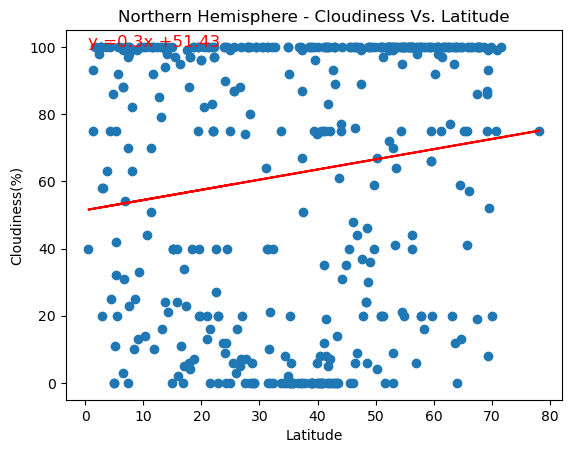

In [30]:
# Performing linear regression on Northen Hemisphere data (latitude vs. cloudiness)
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness(%)", "Northern Hemisphere - Cloudiness Vs. Latitude",
"output_data/NH_Cloudiness_vs_Latitude.png")

                       

The r value is 0.13261768452928943


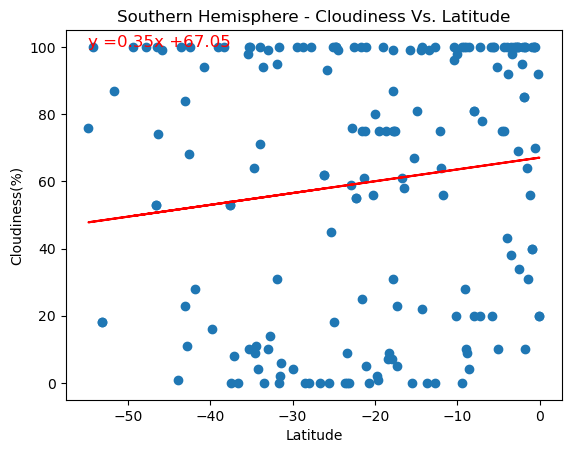

In [31]:
# Performing linear regression on Southern Hemisphere data (latitude vs. cloudiness)
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness(%)", "Southern Hemisphere - Cloudiness Vs. Latitude",
"output_data/SH_Cloudiness_vs_Latitude.png")

**Discussion about the linear relationship:** 
**In the Northern hemisphere**, an r value of 0.147 (approx.) indicates an extremely weak positive linear relationship between latitude and cloudiness (%). This means that there is only a very slight tendency for one variable to increase as the other one increases. The relationship is so weak that it's close to being no linear relationship at all.

**In the southern hemishphere**, the r value of 0.133 (approx.) indicates a very weak positive linear correlation between latitude and cloudiness (%). This value is closer to 0 than to 1, which suggests that as one variable slightly increases, the other variable tends to increase as well, but the relationship is so weak that it may not be considered practically significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.10231125010624481


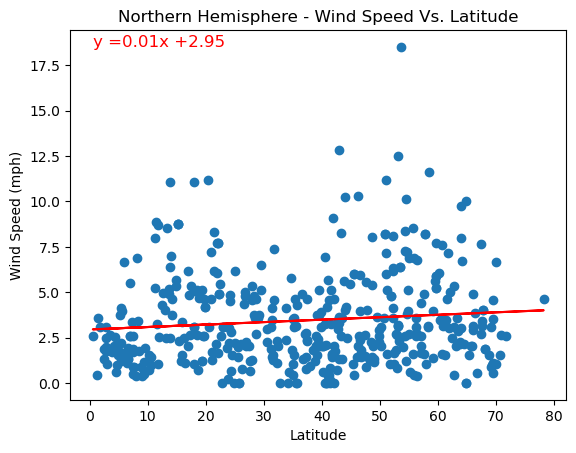

In [33]:
# Performing linear regression on Northen data (latitude vs. wind speed)
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed Vs. Latitude",
"output_data/NH_WindSpeed_vs_Latitude.png")


The r value is -0.31293756569009834


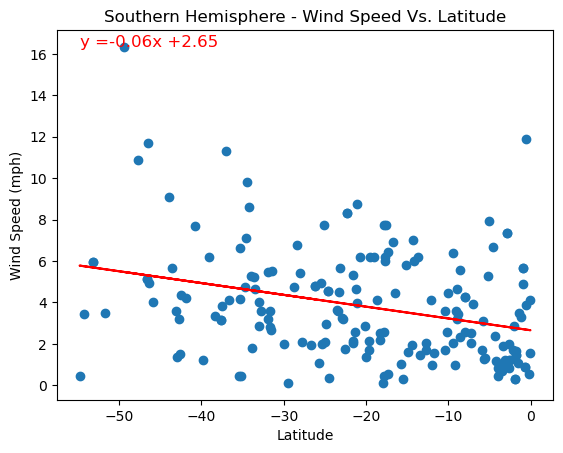

In [34]:
# Performing linear regression on Southern data (latitude vs. wind speed)
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed Vs. Latitude",
"output_data/SH_WindSpeed_vs_Latitude.png")


**Discussion about the linear relationship:
Likewise, **in the Northern hemisphere**, an r value of 0.102 (approx.) indicates a weak positive linear correlation between latitude and wind speed(mph). It signifies that there is a slight upward trend; as one variable increases, the other tends to increase as well, but the relationship is not strong.

**In the Southern hemisphere**, the r value of -0.313 (approx.) indicates a moderate negative linear correlation between latitude and wind speed (mph). This means that as one variable increases, the other tends to decrease, but the relationship is not very strong.